I selected the voice dataset because, I found interisting to check the gender by voice. I will select the values that are important to see which gender a person is.

In [177]:
import seaborn as sns # This is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt # We need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
import math # For the math part on the end
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv('voice.csv', engine='python') # or put utf-8
df.head(10)
# Predict the variable label (male or female)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


*In the table we see that we have a lot of Numerical Variables (ordinal). Only the column "label" has Categorical variables which are Nominal.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [179]:
# Update the dataframe so that only the columns we want to use are in it.
df = df[['meanfreq', 'median', 'IQR', 'meanfun','meandom', "label", "modindx"]]

I'm choicing these columns because of those columns have already the mean and have an influence in assiging the gender. So these values are important for further analyze.

In [180]:
df['label'].value_counts() # Count the amount of males and females. As we can see the amount is equal to each other.

male      1584
female    1584
Name: label, dtype: int64

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


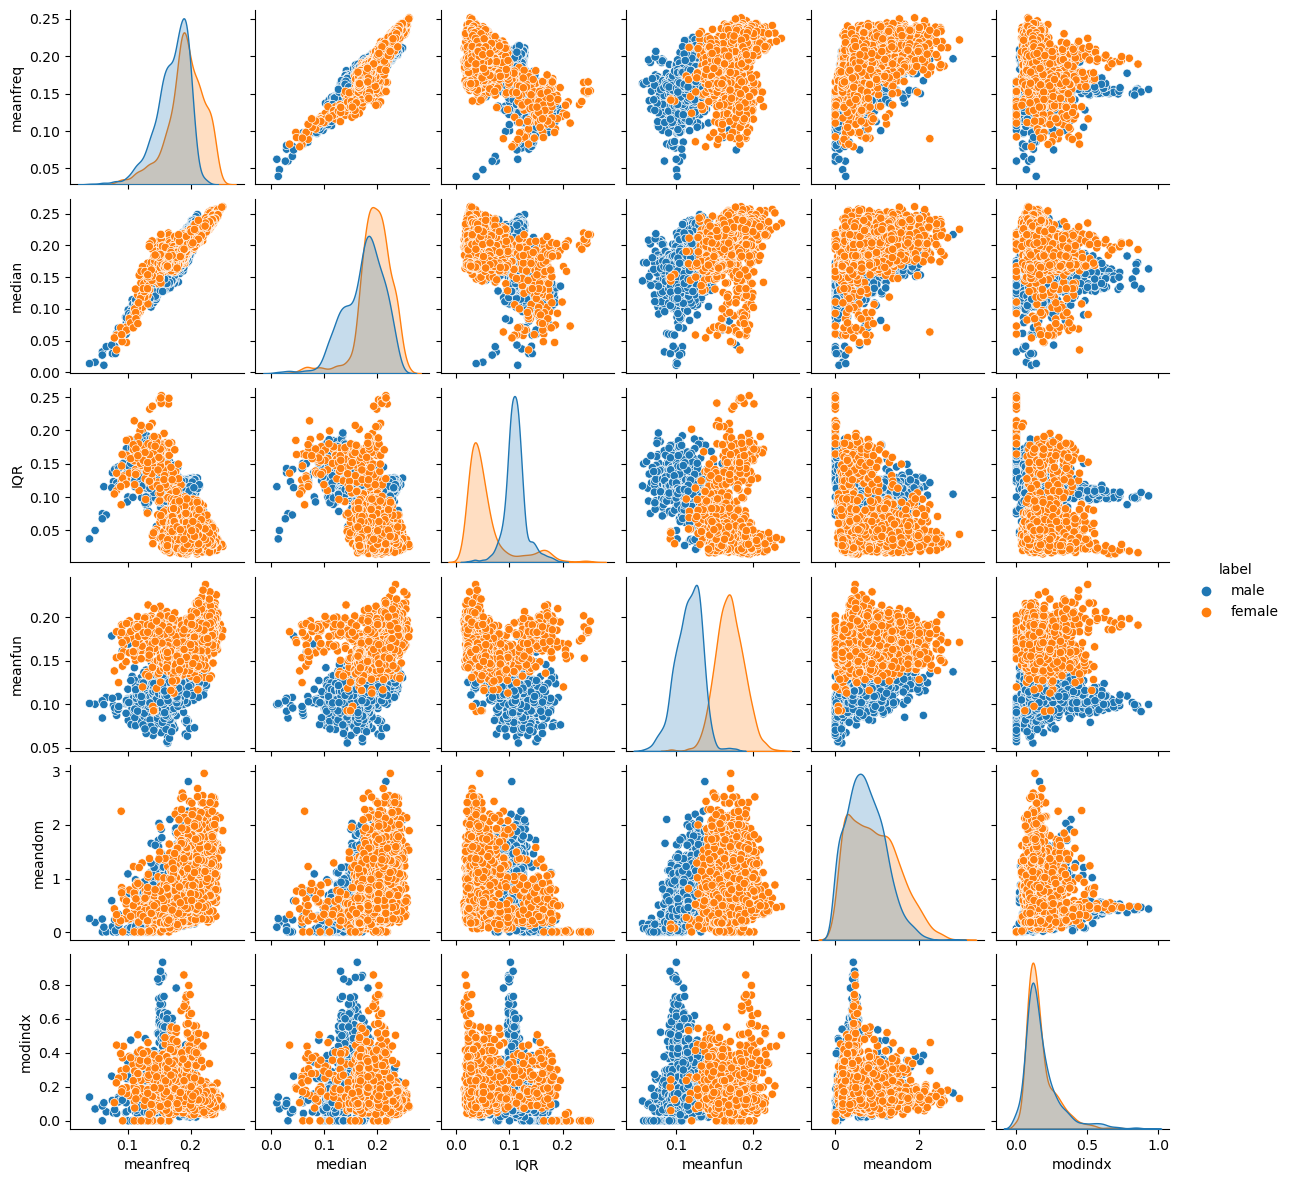

In [181]:
sns.pairplot(df, hue='label', size=2)
plt.show()

In [182]:
fig = sns.FacetGrid(df, hue="label")
fig.map(sns.kdeplot, "meanfun", shade=True)
fig.add_legend()

A meanfun of 0.05 - 0.13 can highly indicate that it's a male, while a meanfun of 0.13- 0,22 highly indicates it's a female gender. 

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


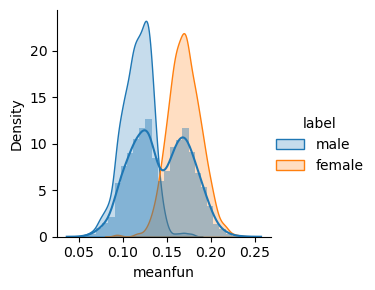

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


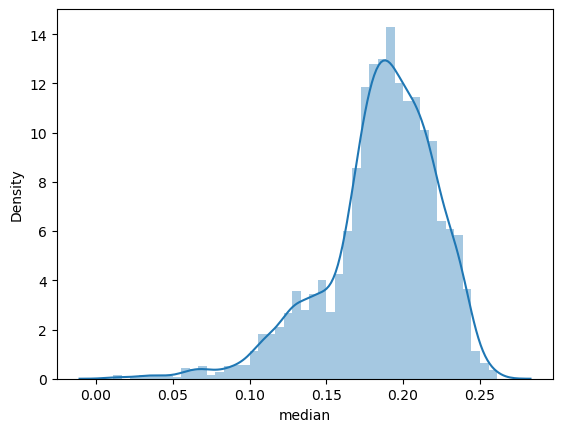

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


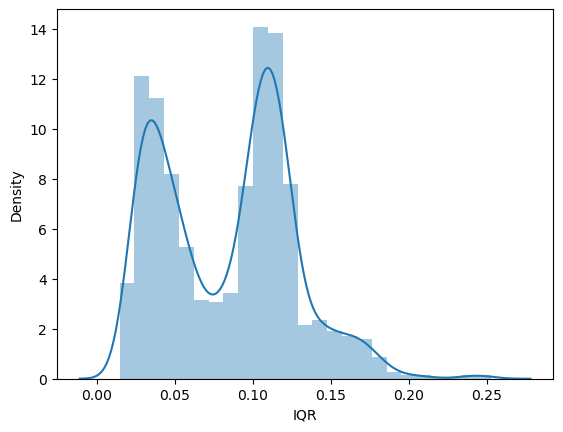

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


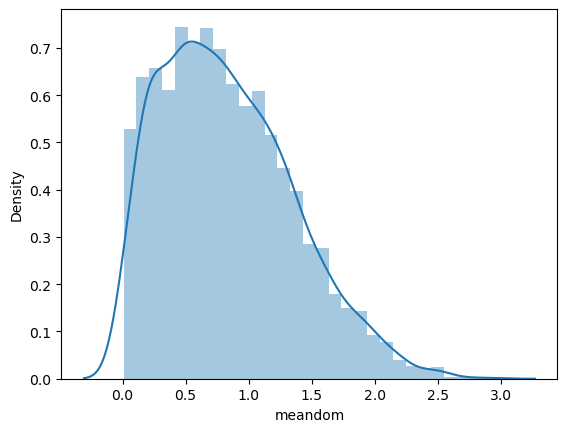

C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


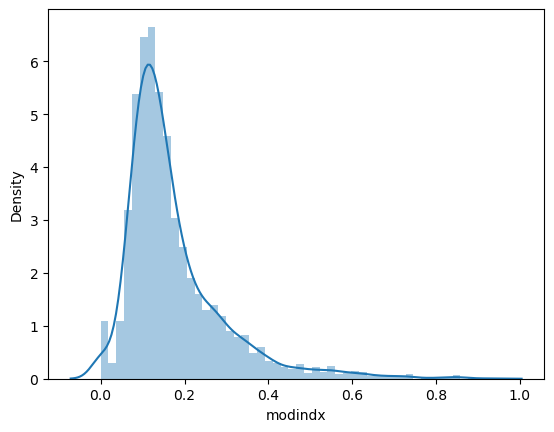

In [183]:
sns.distplot(df['meanfun'])
plt.show()
sns.distplot(df['median'])
plt.show()
sns.distplot(df['IQR'])
plt.show()
sns.distplot(df['meandom'])
plt.show()
sns.distplot(df['modindx'])
plt.show()

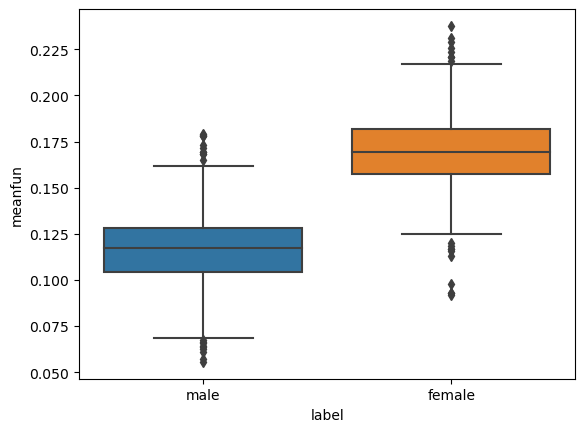

In [184]:
sns.boxplot(data=df, x="label", y="meanfun")
plt.show()

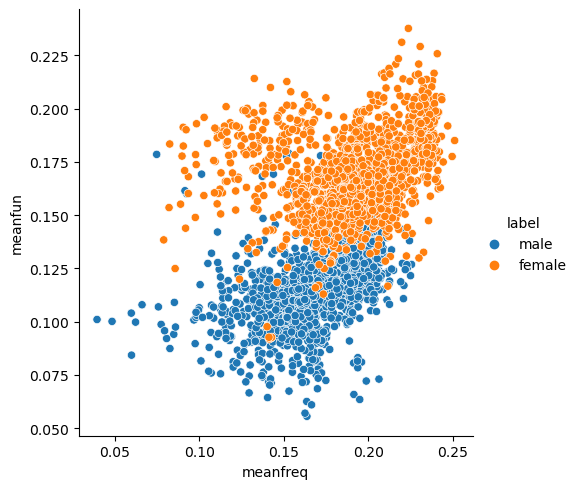

In [185]:
sns.relplot(x='meanfreq',y='meanfun',hue='label',kind='scatter',data=df)
plt.show()

1. At meanfreq We see there are more outliers at females compared to the males.
2. The IQR is a big difference for male and female, where males having outliers on both sides (high and low) wher feamles have a more high outliers.
3. The meanfun we see its close to each other with some outliers at females.

The median is: 0.14051851802812348 of fun
The mean is: 0.14280673427922635 of fun
The Standard Deviation is: 0.03229933362081017 of fun


C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mango\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


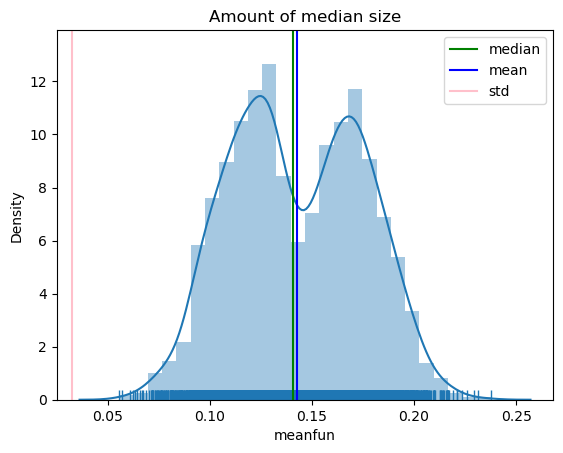

In [186]:
# Density Plot
mean_size = df['meanfun'].mean()
median_size = df['meanfun'].median()
std = np.std(df['meanfun']) # The standard deviation gives an idea of how close the entire set of data is to the average value.
print(f'The median is: {median_size} of fun') # Round to 0 decimal
print(f'The mean is: {(mean_size)} of fun')
print(f'The Standard Deviation is: {(std)} of fun') 
sns.distplot(df['meanfun'], rug=True) # Create Displot
plt.title('Amount of median size')
plt.axvline(median_size, 0, 100, color='green', label='median') # This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

1. The graph is prety nice. It has no Outliers. 
2. The mean and Median seems alright, but the std is really low. 
3. The STD gives an idea of how close the entire set of data is to the average value. 
Data sets with a small standard deviation have tightly grouped, precise data. Data sets with large standard deviations have data spread out over a wide range of values. It's more to male compared to female.

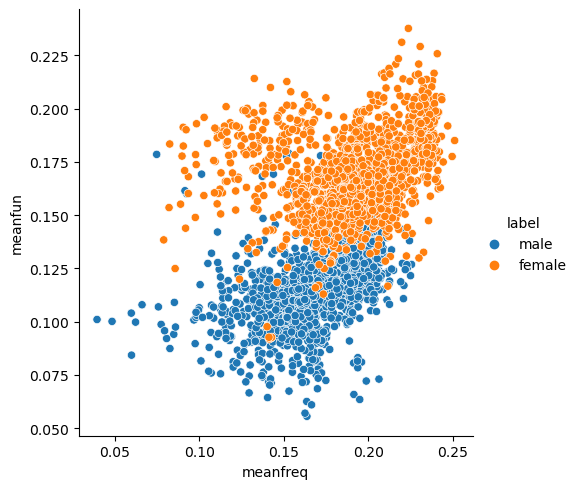

In [187]:
sns.relplot(x='meanfreq',y='meanfun',hue='label',kind='scatter',data=df)
plt.show()

**Machine learning 1 Randomforest
1. The model works as following:
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [188]:
x = df.drop('label',axis = 1) # Remove Columns directly by index.
y = df['label'] # use label

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2) # Set train tests
sc = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
x_train = sc.fit_transform(x_train) # Fit the data, then transform it.
x_test = sc.fit_transform(x_test) # Fit the data, then transform it.
model = RandomForestClassifier(n_estimators = 100,random_state = 42) # 100 default, put random state static
model.fit(x_train,y_train) # Fit it with the data

RandomForestClassifier(random_state=42)

In [190]:
model.score(x_test,y_test) # Let's check the model score

0.9747634069400631

In [191]:
y_preds = model.predict(x_test) # Predict X test

In [192]:
print(classification_report(y_test,y_preds)) # CheckPrecission, recall, f1-score and support score.

              precision    recall  f1-score   support

      female       0.98      0.97      0.97       316
        male       0.97      0.98      0.97       318

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



1. Precision: Accuracy of positive predictions. We see that it is 98%.
2. The recall is: What percent of the positive cases did you catch. Also, here again we see a 98% which is a high number for postive cases.
3. What percent of positive predictions were correct? 


In [193]:
con_mat = confusion_matrix(y_test,y_preds) # Create a matrix with a array
con_mat

array([[306,  10],
       [  6, 312]], dtype=int64)

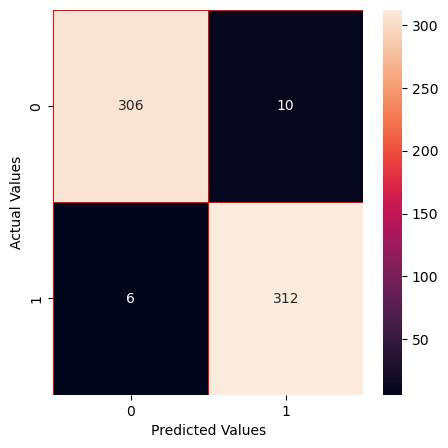

In [194]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) # Create the heatmap
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

We can see the predicted and actual values. We notice that the predicted values are low.

Part 2 Machine learning other model

In [195]:
label_encoder = LabelEncoder() # Encode target labels with value between 0 and n_classes-1.
df["label"] = label_encoder.fit_transform(df["label"]) # Fit label encoder and return encoded labels.

In [196]:
dict(enumerate(label_encoder.classes_)) # Convert label to 0 female and 1 male 

{0: 'female', 1: 'male'}

In [197]:
X = df.drop("label" , axis = 1).values # Remove Columns directly by index.
y = df['label'].values

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # Set train tests
scale = StandardScaler()# Standardize features by removing the mean and scaling to unit variance.
X_train = scale.fit_transform(X_train) # Fit the data, then transform it.
X_test = scale.fit_transform(X_test) # Fit the data, then transform it.
lr = LogisticRegression() # use logisticRegression
lr.fit(X_train,y_train) # Fit it with the data

LogisticRegression()

In [199]:
y_lr = lr.predict(X_test) # Create a predict X test y.-r
lr_score = accuracy_score(y_test, y_lr) # Create variable score and check accuracy_score
print(lr_score) 

0.9621451104100947


As you can see the accuracy of the model is 96%

In [200]:
cm = confusion_matrix(y_test, y_lr) # Create confusion Matrix
print(cm)

[[298  13]
 [ 11 312]]


In [201]:
pd.crosstab(y_test, y_lr, rownames=['Reel'], colnames=['Prediction'], margins=True) # Create crosstab to See the predictions

Prediction,0,1,All
Reel,,,
0,298,13,311
1,11,312,323
All,309,325,634


In [202]:
r2_score(y_test, y_lr) 

0.8485261764208136

85% indicates how much variation their is. 85% is a high value which means that the 2 variables correlated good with not a lot of variance at all.

In [203]:
math.sqrt(mean_squared_error(y_test, y_lr)) # Check the math sqrt 

0.19456333053765645

We notice a math score of 0.19456333053765645 which tells that a